# Stemming and Lemmatization 

In [1]:
# install the nltk (natural language toolkit) library 
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


## Toy Example

In [2]:
# training data
X_train = ['I love the book',
           'This is a great book',
           'The fit is great',
           'I love the shoes']
y_train = ['books','books','clothing','clothing']

In [3]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

In [4]:
vect = CountVectorizer()
vect.fit(X_train)
#document term matrix
X_train_dtm = vect.transform(X_train)
pd.DataFrame(X_train_dtm.toarray(), 
             columns=vect.get_feature_names_out(),
             index = X_train)

,book,fit,great,is,love,shoes,the,this
I love the book,1,0,0,0,1,0,1,0
This is a great book,1,0,1,1,0,0,0,1
The fit is great,0,1,1,1,0,0,1,0
I love the shoes,0,0,0,0,1,1,1,0


In [5]:
X_test = ['I like the book',
          'Shoes are alright',
          'I love the books',
          'I lost a shoe']

In [6]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train_dtm,y_train)

MultinomialNB()

In [7]:
X_test

['I like the book', 'Shoes are alright', 'I love the books', 'I lost a shoe']

In [8]:
X_test_dtm = vect.transform(X_test)
nb_clf.predict(X_test_dtm)

array(['books', 'clothing', 'clothing', 'books'], dtype='<U8')

## Stemming

In [9]:
import nltk

In [10]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4') # open multilingual wordnet library 
# nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [12]:
# initialize the stemmer
stemmer = PorterStemmer()

In [13]:
stemmer.stem('books')

'book'

In [14]:
stemmer.stem('reading')

'read'

In [15]:
stemmer.stem('organizig')

'organizig'

In [16]:
phrase = 'I love the books'
words = word_tokenize(phrase)
words

['I', 'love', 'the', 'books']

In [17]:
stemmed_words = [stemmer.stem(word) for word in words] # apply to each word in words separately 
stemmed_words

['i', 'love', 'the', 'book']

In [18]:
' '.join(stemmed_words)

'i love the book'

## Lemmatization

In [19]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [20]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [21]:
# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

In [22]:
# it needs the parts of speech
lemmatizer.lemmatize('eats',pos='v') # part of speech = verb

'eat'

In [23]:
words

['I', 'love', 'the', 'books']

In [24]:
# parts of speech tagging
nltk.pos_tag(words)

[('I', 'PRP'), ('love', 'VBP'), ('the', 'DT'), ('books', 'NNS')]

In [25]:
# parts of speech processing function 
def process_pos(pos): 
    if pos.startswith('J'): #adjective
        return wordnet.ADJ
    elif pos.startswith('V'): #verb
        return wordnet.VERB
    elif pos.startswith('N'): #noun
        return wordnet.NOUN
    elif pos.startswith('R'): #adverb
        return wordnet.ADV
    else: 
        return wordnet.NOUN

In [26]:
lemmatized_words = [lemmatizer.lemmatize(word,pos=process_pos(pos))
                   for word,pos in nltk.pos_tag(words)]

In [27]:
lemmatized_words

['I', 'love', 'the', 'book']

## Stopwords Removal

In [28]:
from nltk.corpus import stopwords

In [29]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
phrase = 'here is an example sentence demonstrating the removal of stopwords'

In [31]:
words = word_tokenize(phrase)
words

['here',
 'is',
 'an',
 'example',
 'sentence',
 'demonstrating',
 'the',
 'removal',
 'of',
 'stopwords']

In [32]:
stripped_phrase = [word for word in words if word not in stop_words]
stripped_phrase

['example', 'sentence', 'demonstrating', 'removal', 'stopwords']

In [33]:
' '.join(stripped_phrase)

'example sentence demonstrating removal stopwords'

## Punctuation Removal

In [34]:
import string 
punctuation = [punctuation for punctuation in string.punctuation]
punctuation

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [35]:
phrase = "Hello! How are you?"
words = word_tokenize(phrase)
stripped_phrase = [word for word in words if word not in punctuation]
' '.join(stripped_phrase)

'Hello How are you'

## Yelp Reviews Example

In [36]:
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/yelp.csv'
yelp = pd.read_csv(path)[['stars','text']]
yelp

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...
...,...,...
9995,3,First visit...Had lunch here today - used my G...
9996,4,Should be called house of deliciousness!\n\nI ...
9997,4,I recently visited Olive and Ivy for business ...
9998,2,My nephew just moved to Scottsdale recently so...


In [37]:
yelp.stars.value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [38]:
# keep reviews that only contain 1 and 5 stars
yelp = yelp.loc[yelp.stars.isin([1,5])]

In [39]:
text = yelp.loc[yelp.stars==1].iloc[11].text
text

'See the huge sign outside that says $2.50? Yeah, that\'s for shirts only. I was caught off guard when I brought in my skirt and got nailed for about $3.79. As I sadly handed over my $5 bill, the lady at the counter said a lot of people had told her they felt betrayed by the sign outside. No kidding. I had originally been heading down the street to Regal on 7th Ave.--who does a fine job in half the pickup time--for the "advertised" fake price here. Trying to make the best of it,  I told the lady at least I\'d learned they had an onsite alteration service, and maybe that was worth a buck. UH OH. Picked up my skirt a few weeks later with some Jersey Shore-type chick at the counter, and was told I owed another $3.79. I flat-out refused to pay twice. She screamed at me, chased me to my car, wrote down my license plate and said the police would be visiting. Ni-i-i-ice.'

In [40]:
nltk.pos_tag(words)

[('Hello', 'NN'),
 ('!', '.'),
 ('How', 'WRB'),
 ('are', 'VBP'),
 ('you', 'PRP'),
 ('?', '.')]

In [41]:
# process the text 
words = word_tokenize(text)
words = [word.lower() for word in words]
lemmatized_words = [lemmatizer.lemmatize(word,pos=process_pos(pos))
                    for word,pos in nltk.pos_tag(words)
                    if word not in stop_words and word not in punctuation]
' '.join(lemmatized_words)

"see huge sign outside say 2.50 yeah 's shirt catch guard bring skirt get nail 3.79 sadly hand 5 bill lady counter say lot people tell felt betray sign outside kidding originally head street regal 7th ave. -- fine job half pickup time -- `` advertised '' fake price try make best tell lady least 'd learn onsite alteration service maybe worth buck uh oh pick skirt week later jersey shore-type chick counter tell owe another 3.79 flat-out refuse pay twice scream chase car write license plate say police would visit ni-i-i-ice"

In [42]:
yelp['processed_text'] = yelp.text

C:\Users\rebec\AppData\Local\Temp\ipykernel_20128\3872348511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['processed_text'] = yelp.text


In [43]:
def processed_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word,pos=process_pos(pos))
                        for word,pos in nltk.pos_tag(words)
                        if word not in stop_words and word not in punctuation]
    return ' '.join(lemmatized_words)

In [44]:
processed_text(text)

"see huge sign outside say 2.50 yeah 's shirt catch guard bring skirt get nail 3.79 sadly hand 5 bill lady counter say lot people tell felt betray sign outside kidding originally head street regal 7th ave. -- fine job half pickup time -- `` advertised '' fake price try make best tell lady least 'd learn onsite alteration service maybe worth buck uh oh pick skirt week later jersey shore-type chick counter tell owe another 3.79 flat-out refuse pay twice scream chase car write license plate say police would visit ni-i-i-ice"

In [45]:
yelp['processed_text'] = yelp.text.apply(processed_text)

C:\Users\rebec\AppData\Local\Temp\ipykernel_20128\2273887109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['processed_text'] = yelp.text.apply(processed_text)


In [46]:
yelp

,stars,text,processed_text
0,5,My wife took me here on my birthday for breakf...,wife take birthday breakfast excellent weather...
1,5,I have no idea why some people give bad review...,idea people give bad review place go show plea...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",rosie dakota love chaparral dog park 's conven...
4,5,General Manager Scott Petello is a good egg!!!...,general manager scott petello good egg go deta...
6,5,Drop what you're doing and drive here. After I...,drop 're drive eat go back next day food good ...
...,...,...,...
9990,5,Yes I do rock the hipster joints. I dig this ...,yes rock hipster joint dig place little bit sc...
9991,5,Only 4 stars? \n\n(A few notes: The folks that...,4 star note folk rat place low must isolate in...
9992,5,I'm not normally one to jump at reviewing a ch...,'m normally one jump review chain restaurant e...
9994,5,Let's see...what is there NOT to like about Su...,let 's see ... like surprise stadium well 9.50...


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB # or any other classifier
from sklearn.pipeline import Pipeline 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [48]:
X = yelp.processed_text
y = yelp.stars

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [50]:
pipe = Pipeline(steps=[
    ('vect', CountVectorizer(max_features=5000, ngram_range=(1,2))),
    ('clf', MultinomialNB())
])

In [51]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('clf', MultinomialNB())])

In [52]:
y_test_pred = pipe.predict(X_test)

In [53]:
confusion_matrix(y_test,y_test_pred)

array([[153,  25],
       [ 47, 797]], dtype=int64)

## How does the model choose between 5 stars and 1 star

In [54]:
# store the vocabulary 
words = pipe['vect'].get_feature_names_out()
list(words)

['00',
 '000',
 '10',
 '10 15',
 '10 min',
 '10 minute',
 '10 year',
 '100',
 '101',
 '11',
 '11am',
 '12',
 '13',
 '14',
 '15',
 '15 20',
 '15 minute',
 '15 year',
 '150',
 '16',
 '17',
 '18',
 '19',
 '1st',
 '20',
 '20 minute',
 '20 year',
 '200',
 '2010',
 '2011',
 '2012',
 '21',
 '22',
 '23',
 '24',
 '25',
 '28',
 '2am',
 '2nd',
 '30',
 '30 min',
 '30 minute',
 '30 year',
 '30pm',
 '32',
 '35',
 '39',
 '3rd',
 '40',
 '40 minute',
 '45',
 '45 min',
 '45 minute',
 '49',
 '4th',
 '50',
 '500',
 '5th',
 '60',
 '6pm',
 '70',
 '75',
 '7th',
 '80',
 '8pm',
 '90',
 '90 minute',
 '95',
 '99',
 'aa',
 'ability',
 'able',
 'able get',
 'absolute',
 'absolute favorite',
 'absolutely',
 'absolutely amazing',
 'absolutely delicious',
 'absolutely love',
 'ac',
 'accept',
 'access',
 'accessory',
 'accommodate',
 'accomodating',
 'accompany',
 'account',
 'acknowledge',
 'across',
 'across street',
 'act',
 'action',
 'active',
 'activity',
 'actual',
 'actually',
 'actually get',
 'actually go',

In [55]:
pipe['clf'].classes_

array([1, 5], dtype=int64)

In [56]:
# number of times each word appears across all 1-star doc
bad_word_count = pipe['clf'].feature_count_[0,:]

# number of times each word appears across all 5-star doc
good_word_count = pipe['clf'].feature_count_[1,:]

In [57]:
words_df = pd.DataFrame({'word':words,
                         'bad':bad_word_count,
                         'good':good_word_count}).set_index('word')
words_df

,bad,good
word,,
00,34.0,35.0
000,4.0,5.0
10,74.0,128.0
10 15,1.0,8.0
10 min,6.0,2.0
...,...,...
yum yum,0.0,10.0
yummy,4.0,100.0
zero,15.0,6.0


In [58]:
# add 1 to the columns 
words_df = words_df + 1

In [59]:
# convert counts into frequencies 
words_df.bad = words_df.bad/words_df.bad.sum()
words_df.good = words_df.good/words_df.good.sum()

In [60]:
# ratios 
words_df['bad_ratio'] = words_df.bad/words_df.good
words_df['good_ratio'] = words_df.good/words_df.bad

In [61]:
words_df.sort_values(by='good_ratio',ascending=False).head(20)

,bad,good,bad_ratio,good_ratio
word,,,,
fantastic,0.000042,0.001267,0.032926,30.371558
one favorite,0.000021,0.000446,0.046764,21.384056
perfect,0.000083,0.001667,0.050026,19.989444
yum,0.000021,0.000381,0.054690,18.284918
favorite,0.000146,0.002488,0.058667,17.045262
love place,0.000063,0.000989,0.063269,15.805607
organic,0.000021,0.000265,0.078700,12.706468
highly recommend,0.000063,0.000788,0.079345,12.603164
gem,0.000021,0.000258,0.080668,12.396554


In [62]:
yelp.loc[yelp.processed_text.str.contains('mozzarella')].iloc[1].text

'I\'m from Chicago so I\'m picky with my pizza--this place does it right (NY style)! I love the "hole in the wall" feel. Every customer that walked in was a regular which was a good sign. I ordered the Mozzarella sticks and a large Monster Pie (Sausage, pepperoni, bell peppers, onion and cheese). The mozzarella sticks took a little while to come out but they were cooked to perfection. They also threw in a few garlic knots which was awesome. The pizza was unbelievable--I think the crumbled sausage really did it! They have great deals like large pie & 20 wings for $20 which I definitely will be taking advantage of during football games on Sunday. Glad to have found a new place where I can also be a regular!'

## tf-idf (term frequecy - inverse document frequency)

$\text{tf-idf}*\text{log}\left( \frac{n}{1+\text{number containing w}}\right)$

- tf-idf: number of times a word w occurs in a document
- instead of count vectorizer (tf alone is count vectorizer) 
- n = number of documents

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
pipe = Pipeline(steps=[
    ('vect', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('clf', MultinomialNB())
])

In [69]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('clf', MultinomialNB())])

In [70]:
y_test_pred = pipe.predict(X_test)

In [71]:
confusion_matrix(y_test,y_test_pred)

array([[ 36, 142],
       [  0, 844]], dtype=int64)

## Grid Search

In [72]:
from sklearn.model_selection import GridSearchCV

In [79]:
params_dic = {'vect__max_features' : [500,1000,2000,5000],
              'vect__ngram_range' : [(1,1),(1,2)],
              'vect__use_idf' : [False,True], #uses just a count vectorizer when false 
              'clf__alpha' : [0,0.01,0.1,0.25]
             }

In [97]:
grid = GridSearchCV(pipe,
                    params_dic,
                    cv=5,
                    n_jobs=-1,
                    scoring='balanced_accuracy',
                    verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2))),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0, 0.01, 0.1, 0.25],
                         'vect__max_features': [500, 1000, 2000, 5000],
                         'vect__ngram_range': [(1, 1), (1, 2)],
                         'vect__use_idf': [False, True]},
             scoring='balanced_accuracy', verbose=2)

In [98]:
grid.best_params_

{'clf__alpha': 0.1,
 'vect__max_features': 5000,
 'vect__ngram_range': (1, 2),
 'vect__use_idf': True}

In [99]:
best_pipe = grid.best_estimator_

In [100]:
y_test_pred = best_pipe.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[114,  64],
       [  5, 839]], dtype=int64)

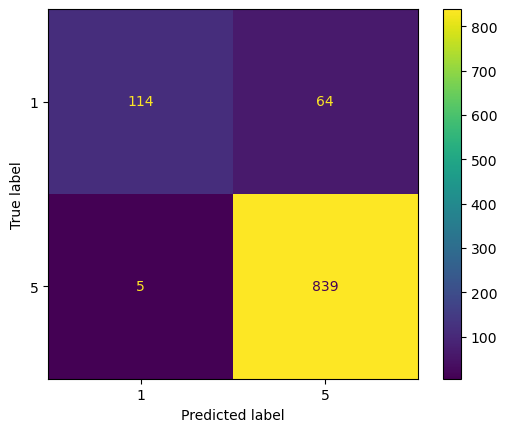

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_pipe,X_test,y_test)

In [103]:
# number of times each word appears across all 1-star doc
bad_word_count = best_pipe['clf'].feature_count_[0,:]

# number of times each word appears across all 5-star doc
good_word_count = best_pipe['clf'].feature_count_[1,:]

In [106]:
words_df = pd.DataFrame({'word':words,
                         'bad':bad_word_count,
                         'good':good_word_count}).set_index('word')

In [107]:
words_df = words_df + 1
words_df.bad = words_df.bad/words_df.bad.sum()
words_df.good = words_df.good/words_df.good.sum()
words_df['bad_ratio'] = words_df.bad/words_df.good
words_df['good_ratio'] = words_df.good/words_df.bad

In [109]:
words_df.sort_values(by='bad_ratio',ascending=False).head(20)

,bad,good,bad_ratio,good_ratio
word,,,,
horrible,0.001148,0.000089,12.892069,0.077567
rude,0.000980,0.000080,12.254661,0.081602
disgust,0.000638,0.000059,10.749343,0.093029
awful,0.000780,0.000077,10.124931,0.098766
gross,0.000665,0.000083,8.048473,0.124247
horrible service,0.000346,0.000050,6.924911,0.144406
service horrible,0.000341,0.000050,6.820560,0.146616
refuse,0.000452,0.000067,6.723971,0.148722
one star,0.000367,0.000055,6.668725,0.149954
